# Detector Gain

You could calculate the mean of each flat image manually using IRAF. Alternatively, you could calculate the means for all of the images automatically using Python.

In [184]:
%matplotlib inline

from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# glob serves some of the same functions as ls in the terminal
import glob
import os

In [185]:
# trying with one to start with:

filepath = './480grp_Z/480_2018_.Flat.18S0X1.Sky.61.fits'
#filepath = './480grp_Z/480_2018_.Bias(0.0S0X1).71.fits'
#^ if you want to use a bias frame instead - both interesting
hdu = fits.open(filepath)
header = hdu[0].header.copy()
data =  hdu[0].data.copy()
data
hdu.close()

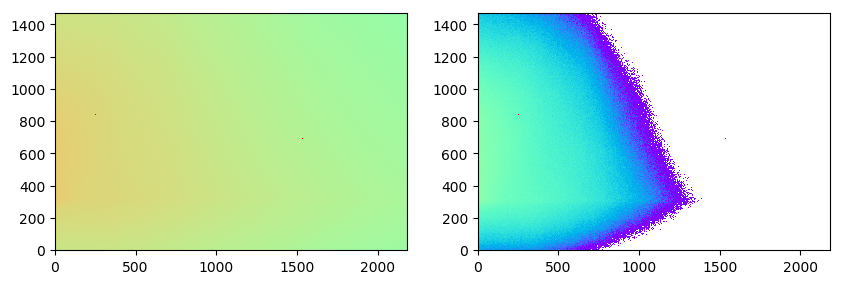

In [186]:
plt.style.use('default')

fig,ax = plt.subplots(1,2)

fig.set_size_inches(10,5)

ax[0].imshow(data, norm=LogNorm(vmin=200), cmap='rainbow', origin='lower')

# and just for a fun look at how unflat this image is:

avgdata = data-np.mean(data)
ax[1].imshow(avgdata, norm=LogNorm(vmin=200), cmap='rainbow', origin='lower');

In [192]:
# looks fine...

directory = './480grp_Z/'

flats_filepath = glob.glob(os.path.join(directory, '*.fits'))
print(flats_filepath[0:5])

['./480grp_Z/480_2018_.Bias(0.0S0X1).70.fits', './480grp_Z/480_2018_.Bias(0.0S0X1).71.fits', './480grp_Z/480_2018_.Flat.0S0X1.Sky.43.fits', './480grp_Z/480_2018_.Flat.0S0X1.Sky.44.fits', './480grp_Z/480_2018_.Flat.0S0X1.Sky.67.fits']


# Calculating and Plotting Linearity:

In [188]:
exp_times = []

means = []

# getting rid of the bias frames the inelegant way

for filename in flats_filepath[2:-1]:
    
        hdu = fits.open(filename)
        header = hdu[0].header.copy()
        data = hdu[0].data.copy()
        exptime = hdu[0].header['exptime']
        exp_times.append(exptime)
        mean = np.mean(data)
        means.append(mean)

exp_times = np.array(exp_times)
means = np.array(means)

time_sort = np.argsort(exp_times)
exp_times = exp_times[time_sort]
means = means[time_sort]
        
hdu.close()

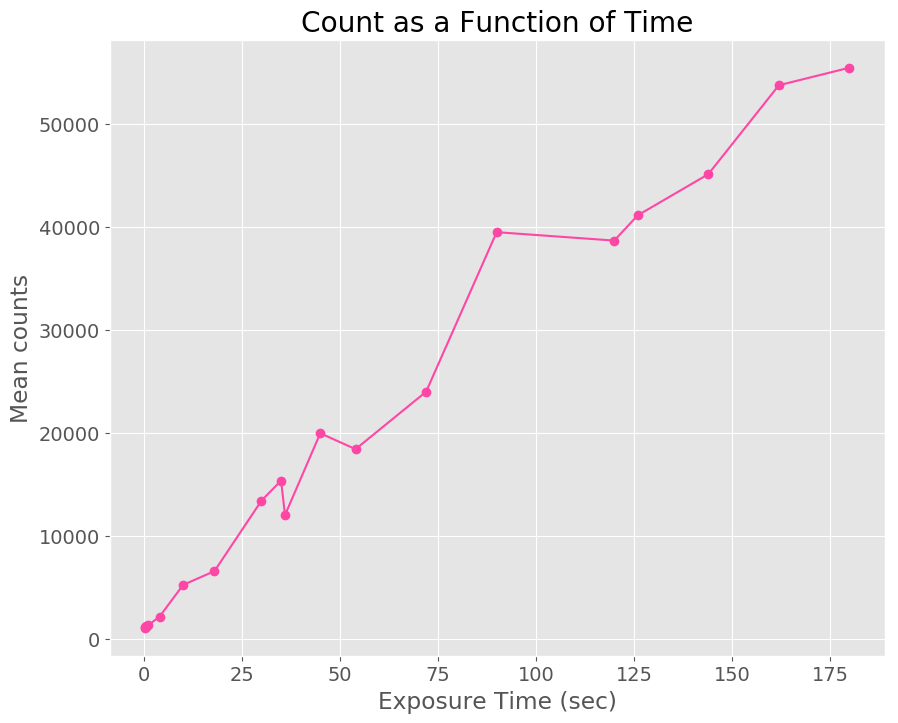

In [196]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 14

plt.plot(exp_times, means, '-ko', c="xkcd:Barbie Pink") # Back in plastic, it's fantastic.
plt.xlabel('Exposure Time (sec)')
plt.ylabel('Mean counts')
plt.title('Count as a Function of Time');

In [ ]:
# Things definitely got a little messed up around the 90-120 second range.

In [190]:
# Can't be bothered making it prettier than this. You get the picture, good enough for government work.

print(means)
print(exp_times)

[ 1130.30505237  1099.77977497  1238.54342694  1176.44690107
  1345.14536426  2180.1097492   5256.90642015  6597.0532837
 13443.54877867 15393.56305741 12045.93470578 19988.60377722
 18446.11338141 24023.59545459 39524.2471305  38706.95406128
 41164.2303322  45158.01623654 53797.94451744 55499.40984084]
[  0.25    0.281   0.5     0.563   1.125   4.     10.     18.     30.
  35.     36.     45.     54.     72.     90.    120.    126.    144.
 162.    180.   ]
